# # NACA 2412
# Cosine clustering is used with even number of points are used for the calculation of 'x'.

In [1]:
import numpy as np
import scipy as sp
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import integrate
from scipy.integrate import cumulative_trapezoid
import csv
from PIL import Image
import os

In [2]:
alpha = 10*np.pi/180
y_mc = 0.02
x_mc = 0.4
t_m = 0.12

In [3]:
## cosine clustering

n = 160
l = int(n/2)

x_cc = np.zeros(l-1)
y_c_cc = np.zeros(l-1)
dy_cdx_cc = np.zeros(l-1)
t_x_cc = np.zeros(l-1)
x_u_cc = np.zeros(l-1)
y_u_cc = np.zeros(l-1)
x_l_cc = np.zeros(l-1)
y_l_cc = np.zeros(l-1)
p_u = np.zeros(l-1)
p_l = np.zeros(l-1)
t_u = np.zeros(l-1)
t_l = np.zeros(l-1)
dyudxu = np.zeros(l-1)
dyldxl = np.zeros(l-1)



delta_theta = 2 * np.pi / (n - 1)

for i in range(1, l, 1):
    x_cc[i - 1] = 0.5 * (1 - np.cos((i - 0.5)*delta_theta))
    # print(x_cc[i-1])
    if x_cc[i - 1] >= 0 and x_cc[i - 1] < x_mc:
        y_c_cc[i - 1] = y_mc * (2 * (x_cc[i - 1] / x_mc) - (x_cc[i - 1] / x_mc)**2)
        dy_cdx_cc[i - 1] = y_mc*(-2*x_cc[i-1]/x_mc**2 + 2/x_mc)
    elif x_cc[i - 1] >= x_mc and x_cc[i - 1] <= 1:
        y_c_cc[i - 1] = y_mc * (2 * ((1 - x_cc[i - 1]) / (1 - x_mc)) - ((1 - x_cc[i - 1]) / (1 - x_mc))**2)
        dy_cdx_cc[i - 1] = y_mc*(-(-2 + 2*x_cc[i-1])/(1 - x_mc)**2 - 2/(1 - x_mc))
    else:
        break
        
    t_x_cc[i - 1] = (t_m) * (2.969 * np.sqrt(x_cc[i - 1]) - 1.260 * (x_cc[i - 1]) - 3.516 * (x_cc[i - 1])**2 + 2.843 * (x_cc[i - 1])**3 - 1.015 * (x_cc[i - 1])**4)
    x_u_cc[i - 1] = x_cc[i - 1] - (t_x_cc[i - 1]/(2 * np.sqrt(1 + (dy_cdx_cc[i - 1])**2)))*dy_cdx_cc[i - 1]
    y_u_cc[i - 1] = y_c_cc[i - 1] + t_x_cc[i - 1]/(2*np.sqrt(1 + (dy_cdx_cc[i - 1])**2))
    x_l_cc[i - 1] = x_cc[i - 1] + (t_x_cc[i - 1]/(2*np.sqrt(1 + (dy_cdx_cc[i - 1])**2))) * dy_cdx_cc[i - 1]
    y_l_cc[i - 1] = y_c_cc[i - 1]-t_x_cc[i - 1]/(2*np.sqrt(1 + (dy_cdx_cc[i - 1])**2))


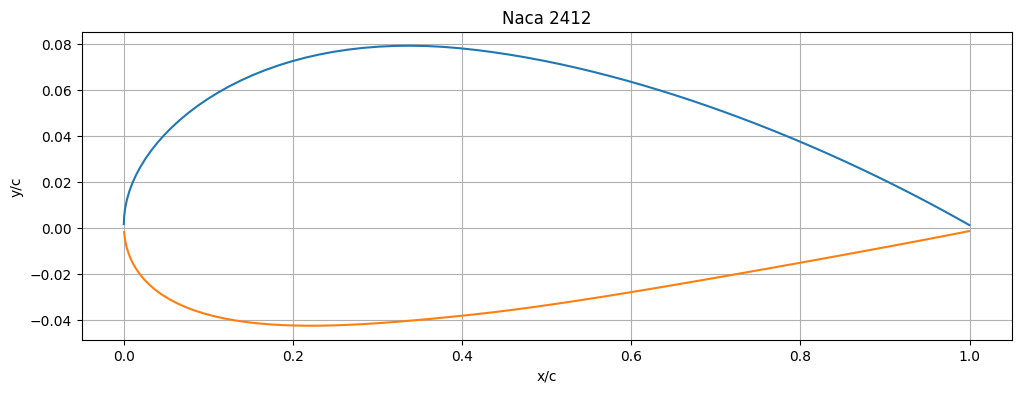

In [6]:
plt.plot(x_u_cc, y_u_cc)
plt.plot(x_l_cc, y_l_cc)
plt.rcParams['figure.figsize'] = (12, 4)
plt.xlabel('x/c')
plt.ylabel('y/c')
plt.title('Naca 2412')
plt.grid()

# Calculation of forces, moment about leading edge, moment about quarter chord, lift, drag and center of pressure.

In [5]:
for i in range(1, l-1, 1):
    
    p_u[i-1] = 4*10**4*(x_cc[i-1]-1)**2+(5.4*10**4)
    p_l[i-1] = 2*10**4*(x_cc[i-1]-1)**2+(1.73*10**5)
    t_u[i-1] = 288*x_cc[i-1]**-0.2
    t_l[i-1] = 731*x_cc[i-1]**-0.2

    dyudxu[i-1] = (y_u_cc[i]-y_u_cc[i-1])/(x_u_cc[i]-x_u_cc[i-1])
    dyldxl[i-1] = (y_l_cc[i]-y_l_cc[i-1])/(x_l_cc[i]-x_l_cc[i-1])

N1 = np.trapz((p_l-p_u), x_cc)
N2 = np.trapz((t_u*dyudxu+t_l*dyldxl), x_cc)
A1 = np.trapz((p_u*dyudxu-p_l*dyldxl), x_cc)
A2 = np.trapz((t_u+t_l), x_cc)
M1 = np.trapz((p_u-p_l)*x_cc, x_cc)
M2 = np.trapz((t_u*dyudxu+t_l*dyldxl)*x_cc, x_cc)
M3 = np.trapz((p_u*dyudxu+t_u)*y_u_cc, x_cc)
M4 = np.trapz((-p_l*dyldxl+t_l)*y_l_cc, x_cc)
N = N1 + N2
A = A1 + A2 
M_LE = M1 - M2 + M3 + M4
L = N*np.cos(alpha)-A*np.sin(alpha)
D = N*np.sin(alpha)+A*np.cos(alpha)
M_qc = M_LE + 0.25*N
C_P = -M_LE/N
print('Normal force=',N)
print('Axial Force =',A)
print('Moment about leading edge =',M_LE)
print('Lift=',L)
print('Drag=',D)
print('Moment about quarter chord =',M_qc)
print('Center of pressure =',C_P)

Normal force= 112204.53818061588
Axial Force = 2451.0794253501927
Moment about leading edge = -57653.54334604512
Lift= 110074.27364789587
Drag= 21897.955602357033
Moment about quarter chord = -29602.408800891146
Center of pressure = 0.5138254145589021


# Here, trapizoidal method isused for the integration and forward differentiation is used for the calculation of differntials.